# ADA Homework Week 12 - Problem 4
## Least Squares probabilistic classification based on a Gaussian kernel model

In [99]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

## Make Data

In [100]:
# Train data
n = 90
c = 3
y = np.repeat(np.arange(1, c + 1), n/c)

x = np.random.randn(n // c, c) + np.tile(np.linspace(-3, 3, c), (n // c, 1))
x = x.flatten(order='F').reshape(-1,1)

# Test data
N = 100
X = np.linspace(-5, 5, N).reshape(-1, 1)


## Compute the Least Squares Classification using Gaussian Kernel

In [101]:
def LSPCG(x, y, X):

    # Reference: Masashi Sugiyama. 2015. Introduction to Statistical Machine Learning.

    l = 0.1
    hh = 2 * 1 ** 2

    # Gaussian Kernel matrix for train and test data.
    k = np.exp(-np.sum((x[:, None] - x[None]) ** 2, axis=2))/hh
    K = np.exp(-np.sum((X[:, None] - x[None]) ** 2, axis=2))/hh

    Kt = np.zeros((N, c))

    for yy in range(1, c + 1):
        yk = y == yy
        ky = k[:, yk]
        # Compute Least Squares Solution
        ty = np.linalg.solve(ky.T @ ky + l * np.eye(np.sum(yk)), ky.T @ yk)
        # replace negative values with 0
        Kt[:, yy - 1] = np.maximum(0, K[:, yk] @ ty)
    
    # Compute probabilities by diviing prob with sum of prob.
    ph = Kt / np.tile(np.sum(Kt, axis=1), (c, 1)).T

    return ph


In [102]:
ph = LSPCG(x, y, X)

## Plot Solution

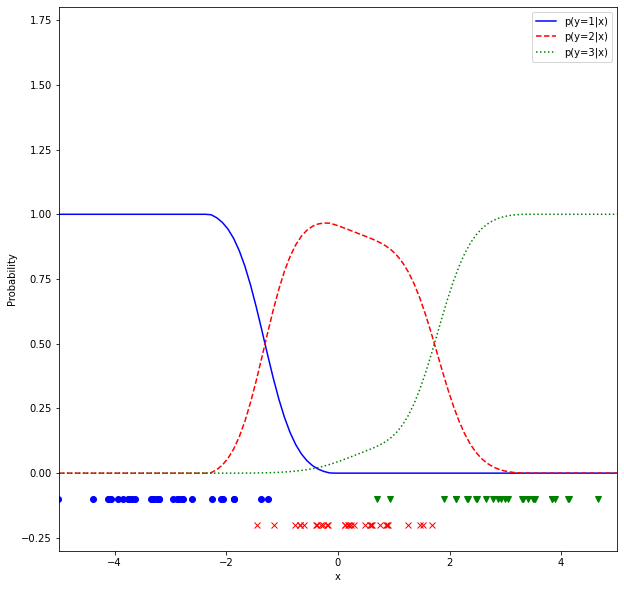

In [103]:
plt.figure(figsize=(10,10))
plt.clf()
plt.axis([-5, 5, -0.3, 1.8])
plt.plot(X, ph[:, 0], 'b-')
plt.plot(X, ph[:, 1], 'r--')
plt.plot(X, ph[:, 2], 'g:')
plt.plot(x[y == 1], -0.1 * np.ones(n // c), 'bo')
plt.plot(x[y == 2], -0.2 * np.ones(n // c), 'rx')
plt.plot(x[y == 3], -0.1 * np.ones(n // c), 'gv')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(['p(y=1|x)', 'p(y=2|x)', 'p(y=3|x)'])
plt.show()